In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('diabetes_indian.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


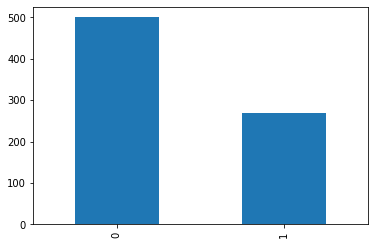

In [62]:
df['Outcome'].value_counts().plot(kind = 'bar')
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
X = df.iloc[:,0:8].values
y = df['Outcome'].values

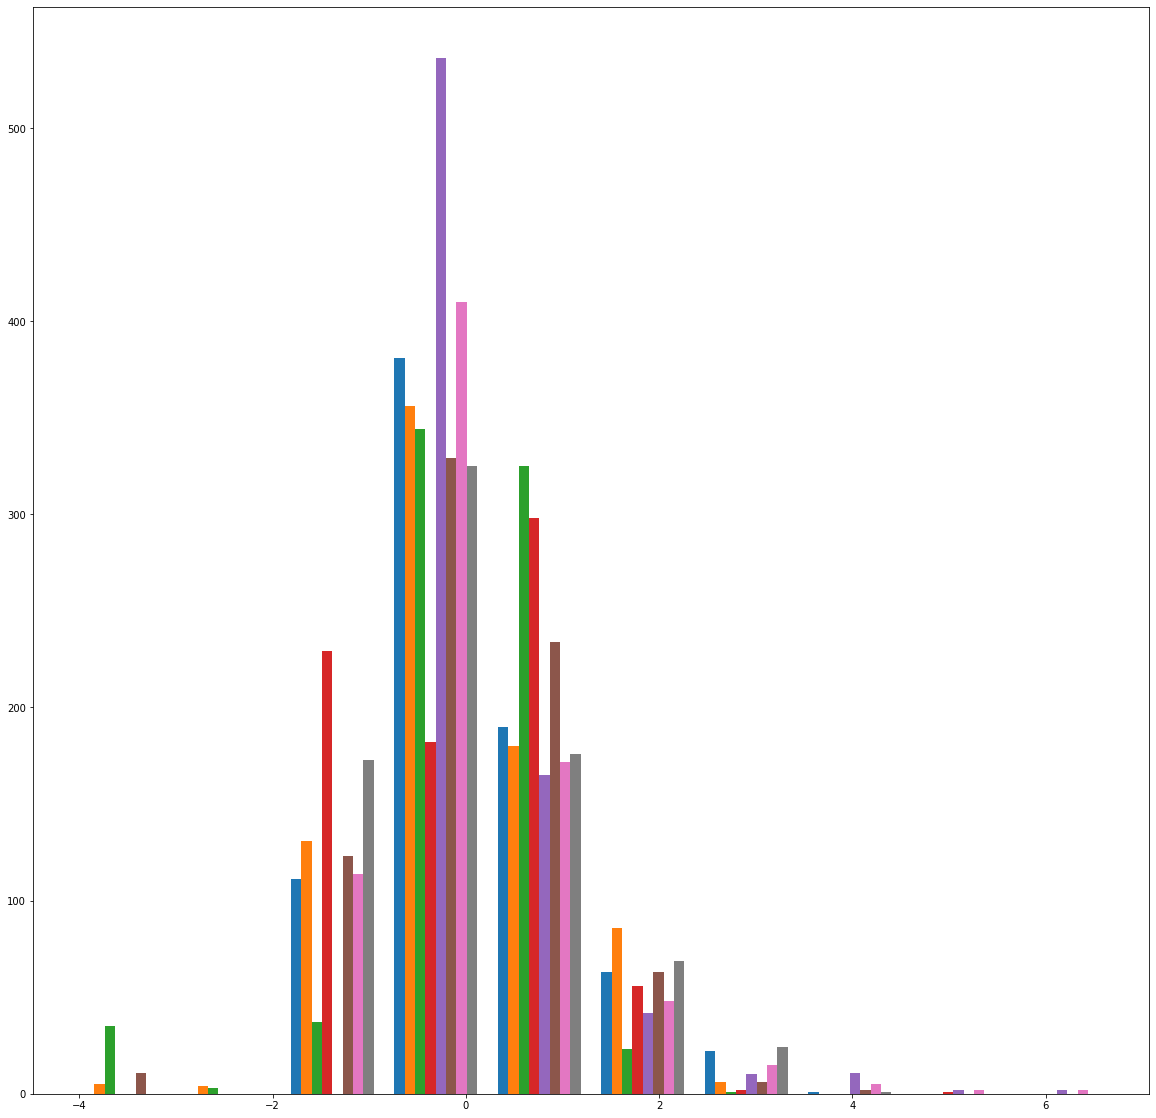

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.figure(figsize = (20,20))
plt.hist(X)
plt.show()

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.25, shuffle = True, random_state = 42)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [69]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model = Sequential()

In [71]:
model.add(Dense(2, input_dim = 8, activation = 'relu'))

In [72]:
model.add(Dense(4, activation = 'relu'))

In [73]:
model.add(Dense(8, activation = 'relu'))

In [74]:
model.add(Dense(4, activation = 'relu'))

In [75]:
model.add(Dense(2, activation = 'relu'))

In [76]:
model.add(Dense(1, activation = 'sigmoid'))

In [77]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [78]:
model.fit(X_train, y_train, batch_size = 256, epochs = 100)

Train on 576 samples
Epoch 1/100
576/576 [==============================] - 1s 2ms/sample - loss: 0.6912 - acc: 0.6528
Epoch 2/100
576/576 [==============================] - 0s 30us/sample - loss: 0.6903 - acc: 0.6580
Epoch 3/100
576/576 [==============================] - 0s 32us/sample - loss: 0.6895 - acc: 0.6649
Epoch 4/100
576/576 [==============================] - 0s 32us/sample - loss: 0.6887 - acc: 0.6649
Epoch 5/100
576/576 [==============================] - 0s 35us/sample - loss: 0.6880 - acc: 0.6701
Epoch 6/100
576/576 [==============================] - 0s 28us/sample - loss: 0.6873 - acc: 0.6719
Epoch 7/100
576/576 [==============================] - 0s 28us/sample - loss: 0.6866 - acc: 0.6719
Epoch 8/100
576/576 [==============================] - 0s 30us/sample - loss: 0.6859 - acc: 0.6753
Epoch 9/100
576/576 [==============================] - 0s 22us/sample - loss: 0.6852 - acc: 0.6788
Epoch 10/100
576/576 [==============================] - 0s 32us/sample - loss: 0.6845 - a

In [79]:
model.predict(X_test)

array([[0.42823672],
       [0.42823672],
       [0.42823672],
       [0.4431285 ],
       [0.45797324],
       [0.4908273 ],
       [0.42823672],
       [0.43712813],
       [0.51823723],
       [0.45835593],
       [0.42823672],
       [0.7046956 ],
       [0.49163288],
       [0.42823672],
       [0.42823672],
       [0.43259758],
       [0.42823672],
       [0.42823672],
       [0.5452795 ],
       [0.47027573],
       [0.42823672],
       [0.42823672],
       [0.4796024 ],
       [0.42823672],
       [0.45596054],
       [0.71625614],
       [0.42823672],
       [0.42823672],
       [0.42823672],
       [0.42823672],
       [0.7076371 ],
       [0.53456503],
       [0.7006645 ],
       [0.60328215],
       [0.4536672 ],
       [0.66754365],
       [0.9201915 ],
       [0.42823672],
       [0.50015074],
       [0.51707596],
       [0.42823672],
       [0.42823672],
       [0.43608937],
       [0.42832434],
       [0.42823672],
       [0.65855   ],
       [0.7101476 ],
       [0.428

In [80]:
model.evaluate(X_test,y_test, batch_size = 256, verbose = 2)

192/1 - 0s - loss: 0.6231 - acc: 0.7604


[0.6231195330619812, 0.7604167]

In [81]:
model.save('nn_model.h5')